In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split




In [26]:
!pip install imblearn

     |████████████████████████████████| 199 kB 431 kB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 141 kB/s eta 0:00:01     |██                              | 552 kB 682 kB/s eta 0:00:12
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
df_ol_shop = pd.read_csv('./Data/online_shoppers_intention.csv')

df_ol_shop.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9731,10,1455.350000,0,0.0,66,1646.612195,0.007143,0.029065,0.0,0.0,Nov,2,2,1,2,Returning_Visitor,True,False
4981,5,81.666667,0,0.0,43,875.000000,0.000000,0.009762,0.0,0.0,May,2,2,5,4,Returning_Visitor,False,False
11409,0,0.000000,3,82.5,9,143.375000,0.016667,0.055556,0.0,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
1645,1,9.000000,0,0.0,32,536.683333,0.000000,0.000587,0.0,0.0,Mar,2,2,1,3,Returning_Visitor,False,False
5336,0,0.000000,0,0.0,5,70.000000,0.040000,0.120000,0.0,0.0,May,1,1,1,3,Returning_Visitor,False,False


### 1. Data Cleansing

#### A. Missing Handle Value


In [3]:
df_ol_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Check missing value foreach column 

df_ol_shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Tidak terdapat missing value, sehingga tidak perlu handdling missing value.

#### B. Handle duplicated data

In [5]:
# Check total duplicate

df_ol_shop.duplicated().sum()

125

In [6]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df_ol_shop.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

##### Menghapus data duplicates

#### C. Handle outliers

In [8]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

In [9]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Menggunakan Zscore

In [10]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))

filtered_entries = np.array([True] * len(df_ol_shop_2))
# print(filtered_entries)

for col in nums:
    zscore = abs(stats.zscore(df_ol_shop_2[col]))
    # print(zscore)
    filtered_entries = (zscore < 3) & filtered_entries
    # print(filtered_entries)

df_ol_shop_zscore = df_ol_shop_2[filtered_entries]
print('Data sesudah handling outlier: ', len(df_ol_shop_zscore))

Data Sebelum handling outlier:  12205
Data sesudah handling outlier:  10020


##### Menggunakan IQR

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    Q1 = df_ol_shop_2[col].quantile(0.25)
    Q3 = df_ol_shop_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_iqr = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_iqr)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5044


#### Menggunakan Flooring and Capping

In [13]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    low_limit = df_ol_shop_2[col].quantile(0.10)
    high_limit = df_ol_shop_2[col].quantile(0.90)
    

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_flor_cap = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_flor_cap)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5150


##### Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020, sedangkan menggunakan IQR dan Flooring and Capping terlalu banyak data yang dihapus. Oleh Karena itu tidak perlu dilakukan handling outlier(penghapusan data outlier), melainkan dilakukan feature transformation saja

#### D. Feature transformation

##### Data sebaran sebelum dilakukan Feature transformation

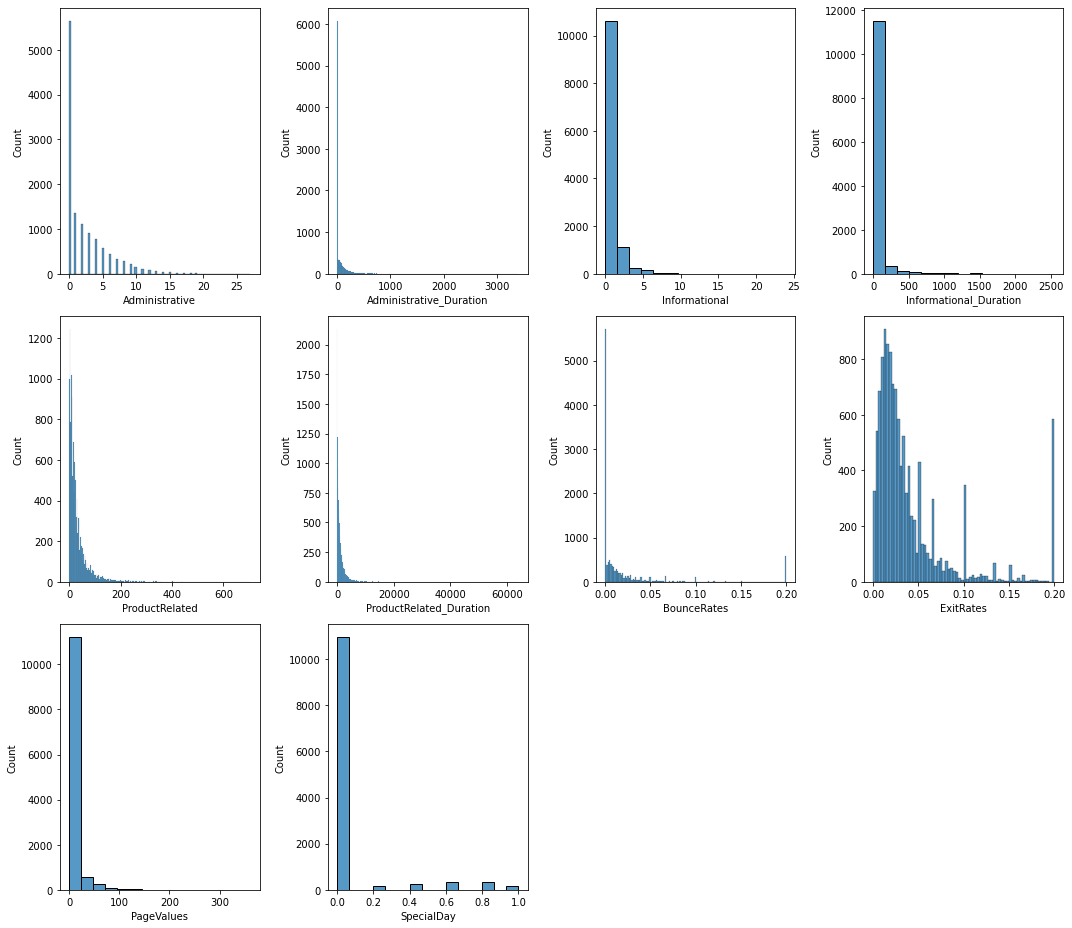

In [14]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_2, x=nums[i]) # 
    plt.tight_layout()

#### Menggunakan Robust Scaler

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [16]:
df_ol_shop_robust_scaler = df_ol_shop_2.copy()

df_ol_shop_robust_scaler.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6689,0,0.00,0,0.0,32,707.700000,0.025000,0.084375,0.000000,0.0,June,2,2,6,13,Returning_Visitor,False,False
9476,0,0.00,0,0.0,3,47.500000,0.100000,0.166667,0.000000,0.0,Nov,3,3,3,1,Returning_Visitor,False,False
6109,8,289.00,0,0.0,139,5107.034928,0.015444,0.044005,8.304904,0.0,Aug,2,2,2,1,Returning_Visitor,False,False
6791,4,253.15,0,0.0,81,1839.130000,0.014683,0.018380,0.000000,0.0,Sep,3,2,3,13,Returning_Visitor,False,False
8217,0,0.00,0,0.0,19,347.000000,0.000000,0.010526,0.000000,0.0,Dec,2,2,2,1,Returning_Visitor,False,False


In [17]:
nums_robust = []
for col in nums:
    col_name = 'robust_' + col
    nums_robust.append(col_name)
    df_ol_shop_robust_scaler[col_name] = scaler.fit_transform(df_ol_shop_robust_scaler[col].values.reshape(len(df_ol_shop_robust_scaler), 1))
    df_ol_shop_robust_scaler = df_ol_shop_robust_scaler.drop(columns=col)

df_ol_shop_robust_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,robust_Administrative,robust_Administrative_Duration,robust_Informational,robust_Informational_Duration,robust_ProductRelated,robust_ProductRelated_Duration,robust_BounceRates,robust_ExitRates,robust_PageValues,robust_SpecialDay
9321,Nov,1,1,8,3,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.0,-0.266667,-0.280296,2.226087,1.137078,0.000000,0.0
8268,Nov,3,2,8,11,Returning_Visitor,False,True,0.00,0.698698,0.0,0.0,0.066667,0.439569,-0.173913,-0.670584,21.419437,0.0
11012,Nov,2,2,7,1,Returning_Visitor,False,True,1.00,1.436114,2.0,349.0,0.500000,1.208725,0.595318,0.576887,16.581652,0.0
813,Mar,2,5,1,3,Returning_Visitor,False,False,0.25,2.101373,1.0,50.0,0.400000,0.664035,-0.173913,-0.109334,0.000000,0.0
4723,May,2,2,2,2,Returning_Visitor,False,False,-0.25,-0.095037,0.0,0.0,0.333333,-0.349602,-0.173913,-0.312384,0.000000,0.6


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Robust Scaler

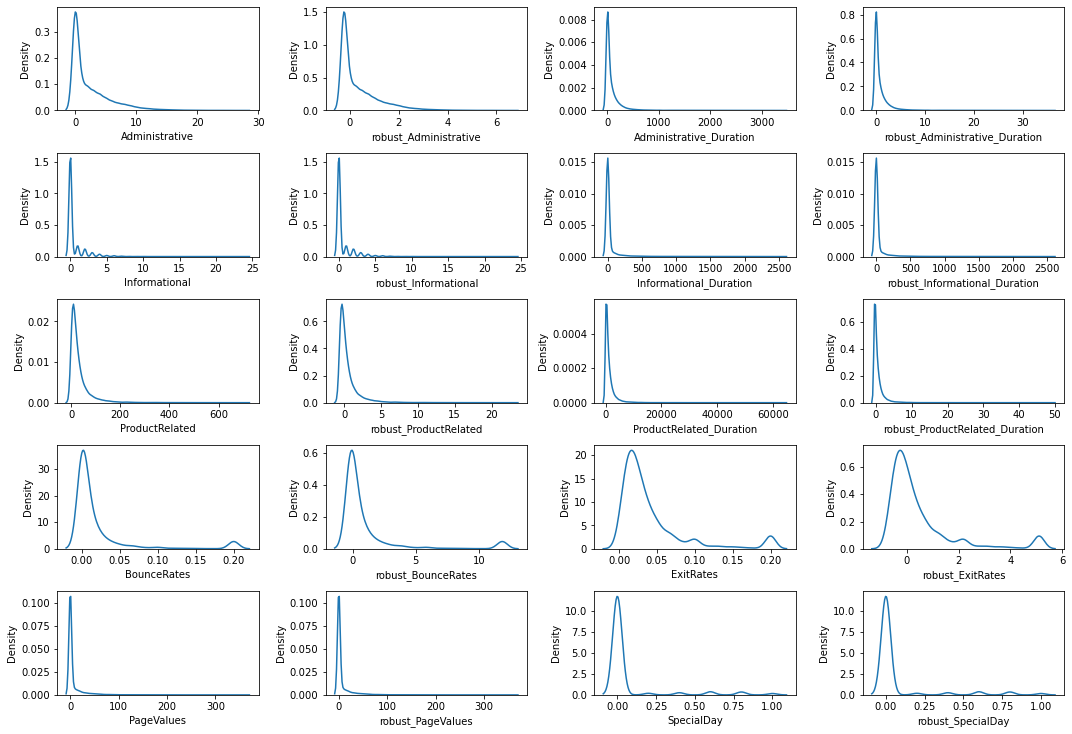

In [18]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_robust_scaler, x=nums_robust[i])

    plt.tight_layout()

##### Menggunakan Log Transformation

In [23]:
df_ol_shop_log_transformation = df_ol_shop_2.copy()

df_ol_shop_log_transformation.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11485,16,164.925000,5,66.875,64,1899.598899,0.010965,0.029950,83.786512,0.0,Nov,3,2,1,3,Returning_Visitor,True,False
11358,4,68.750000,0,0.000,23,585.650000,0.000000,0.008696,0.000000,0.0,Dec,8,1,1,2,New_Visitor,True,False
6874,3,49.400000,0,0.000,11,285.600000,0.000000,0.021429,0.000000,0.0,Oct,2,2,7,2,Returning_Visitor,False,False
9458,5,161.350000,0,0.000,18,251.900000,0.000000,0.030159,0.000000,0.0,Nov,1,1,1,2,Returning_Visitor,True,False
4859,8,57.833333,1,3.000,115,8388.316083,0.012525,0.029541,0.000000,0.8,May,3,2,2,6,Returning_Visitor,False,False


In [24]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    # np.log(df.mask(df <=0)).fillna(0)
    df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col])
    # df_ol_shop_log_transformation[log_name_colum] = np.log(df_ol_shop_log_transformation[col].mask(df_ol_shop_log_transformation[col] <= 0)).fillna(0)
    df_ol_shop_log_transformation = df_ol_shop_log_transformation.drop(columns=col)

# print(nums_log)
df_ol_shop_log_transformation.sample(5)


/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/array

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
3788,May,3,2,1,3,Returning_Visitor,False,False,0.0,1.791759,-inf,-inf,3.178054,5.713678,-4.007333,-3.784190,-inf,-0.510826
10532,Nov,1,1,3,2,Returning_Visitor,False,False,0.0,-inf,0.693147,5.886104,4.406719,8.833269,-6.028278,-4.313967,-inf,-inf
3229,May,3,2,9,13,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,0.000000,-inf,-1.609438,-1.609438,-inf,-inf
3058,May,3,2,3,13,Returning_Visitor,True,False,-inf,-inf,-inf,-inf,3.433987,6.247029,-4.976734,-3.965133,-inf,-inf
8533,Nov,2,5,3,1,Returning_Visitor,False,False,-inf,-inf,0.693147,3.135494,1.386294,4.056123,-inf,-2.708050,-inf,-inf


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

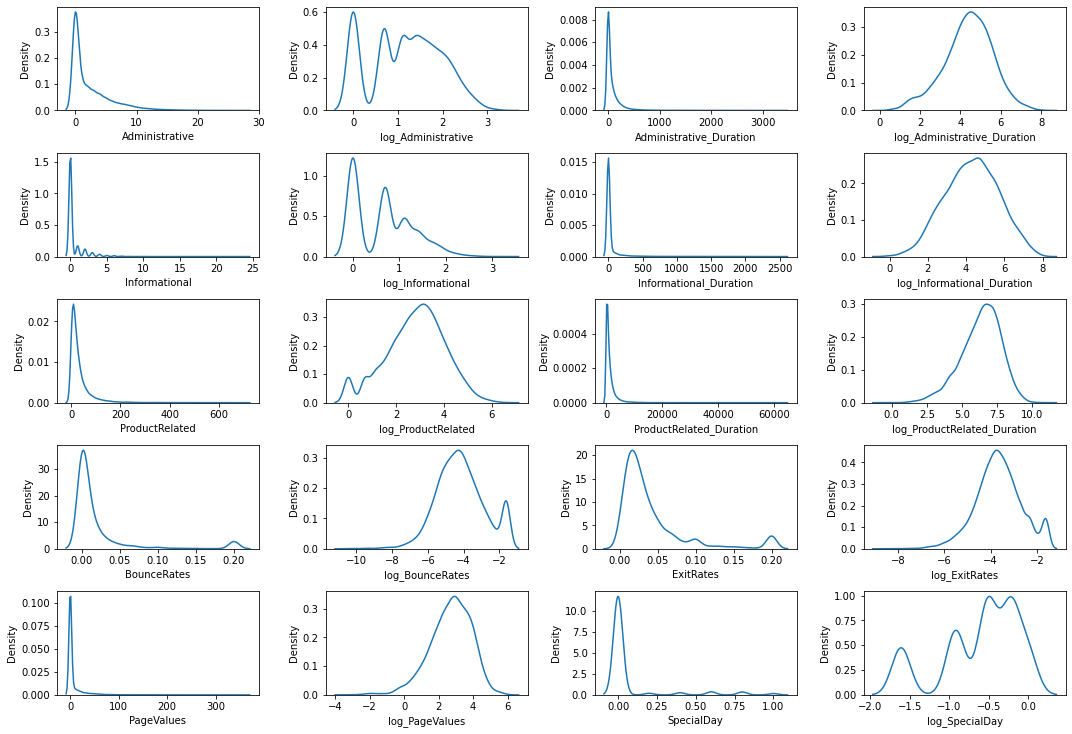

In [25]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_log_transformation, x=nums_log[i])

    plt.tight_layout()

#### Menggunakan Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [27]:
df_ol_shop_std_scaler = df_ol_shop_2.copy()

In [28]:
nums_std = []
for col in nums:
    col_name = 'std_' + col
    nums_std.append(col_name)
    df_ol_shop_std_scaler[col_name] = standar_scaler.fit_transform(df_ol_shop_std_scaler[col].values.reshape(len(df_ol_shop_std_scaler), 1))
    df_ol_shop_std_scaler = df_ol_shop_std_scaler.drop(columns=col)

df_ol_shop_std_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,std_Administrative,std_Administrative_Duration,std_Informational,std_Informational_Duration,std_ProductRelated,std_ProductRelated_Duration,std_BounceRates,std_ExitRates,std_PageValues,std_SpecialDay
3453,May,3,2,6,2,Returning_Visitor,False,False,-0.101756,4.295324,-0.398824,-0.246257,-0.584090,-0.528508,0.654748,0.726469,-0.318962,2.694899
11021,Nov,2,2,3,2,Returning_Visitor,False,False,0.799064,-0.237465,1.953076,0.193924,6.883647,7.778657,-0.344533,-0.460819,-0.318962,-0.310240
5415,Oct,2,2,8,2,Returning_Visitor,False,False,1.399610,1.216746,-0.398824,-0.246257,0.761448,1.232212,-0.322034,-0.631513,0.097395,-0.310240
9173,Dec,3,2,4,3,Returning_Visitor,False,False,0.498791,0.278073,-0.398824,-0.246257,-0.494387,-0.480058,0.286453,0.906997,-0.318962,-0.310240
1923,Mar,1,1,2,2,Returning_Visitor,True,False,-0.101756,-0.026179,-0.398824,-0.246257,-0.584090,-0.570445,-0.450137,-0.279331,-0.318962,-0.310240


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Standardization

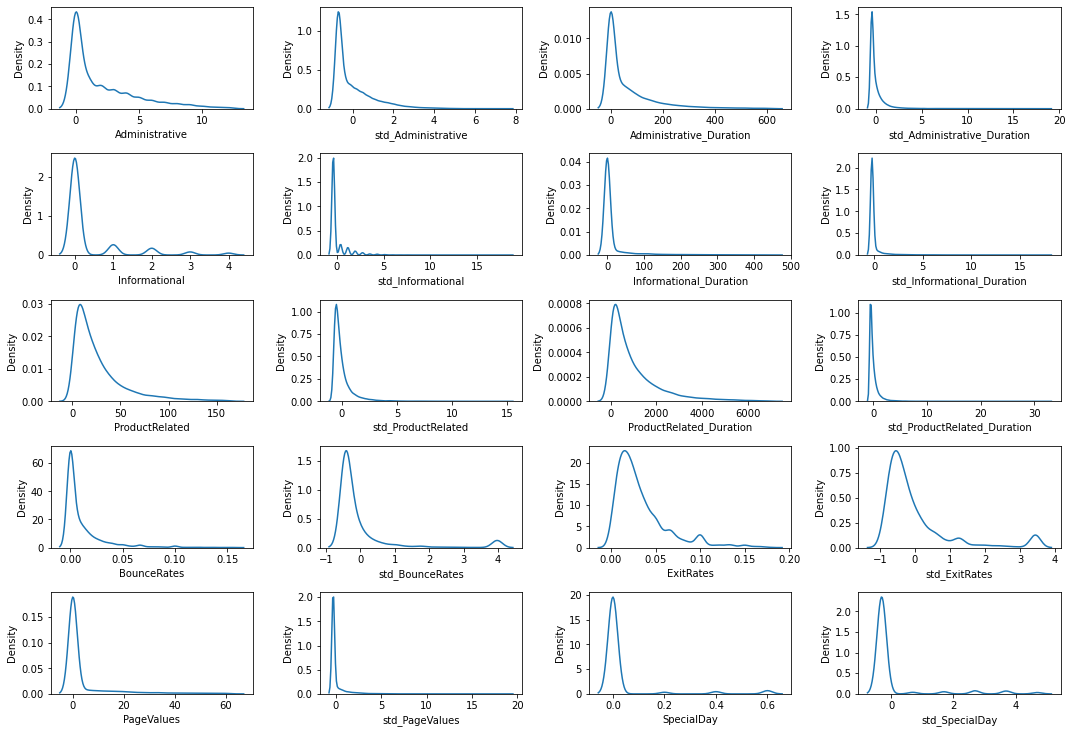

In [29]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_std_scaler, x=nums_std[i])

    plt.tight_layout()

#### Menggunakan Yeo - Jonshon

In [30]:
from sklearn.preprocessing import PowerTransformer
scaler_yeo_jonshon = PowerTransformer(method='yeo-johnson')

In [33]:
df_ol_shop_yeo_jo = df_ol_shop_2.copy()
df_ol_shop_yeo_jo.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2806,10,197.166667,0,0.0,35,1078.727778,0.000000,0.010453,39.755772,0.0,May,2,2,3,3,Returning_Visitor,False,False
10536,0,0.000000,0,0.0,5,41.000000,0.040000,0.080000,0.000000,0.0,Dec,2,5,1,1,Returning_Visitor,False,False
7669,8,574.550000,0,0.0,15,571.423860,0.031579,0.029645,0.000000,0.0,Oct,3,2,4,2,Returning_Visitor,False,False
7069,2,61.500000,0,0.0,6,99.000000,0.000000,0.008333,0.000000,0.0,Oct,1,1,6,3,Returning_Visitor,False,False
3909,0,0.000000,0,0.0,8,135.833333,0.000000,0.025000,0.000000,0.4,May,2,2,9,3,Returning_Visitor,False,False


In [34]:
nums_yj = []
for col in nums:
    col_name = 'yj_' + col
    nums_yj.append(col_name)
    df_ol_shop_yeo_jo[col_name] = scaler_yeo_jonshon.fit_transform(df_ol_shop_yeo_jo[col].values.reshape(len(df_ol_shop_yeo_jo), 1))
    df_ol_shop_yeo_jo = df_ol_shop_yeo_jo.drop(columns=col)

df_ol_shop_yeo_jo.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
3030,May,3,2,2,3,Returning_Visitor,False,False,0.834177,0.784621,-0.523851,-0.494799,0.886844,0.417857,0.584991,-0.797606,-0.532801,-0.33763
7327,June,2,2,5,2,Returning_Visitor,False,False,1.610879,1.412338,1.987796,2.063400,1.925066,1.945870,-0.233903,-0.699066,-0.532801,-0.33763
3396,May,3,2,3,2,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,-0.787183,-0.802948,-0.002360,-0.532801,-0.33763
9278,Nov,2,2,1,2,Returning_Visitor,False,True,1.509501,1.180247,1.987796,2.046541,2.317446,2.058099,-0.392825,-0.715082,1.885999,-0.33763
7574,Sep,2,2,4,13,Returning_Visitor,False,False,1.563644,1.759557,1.992722,2.072217,2.871674,3.707509,0.163816,-0.071350,1.070700,-0.33763


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Yeo-Jonshon

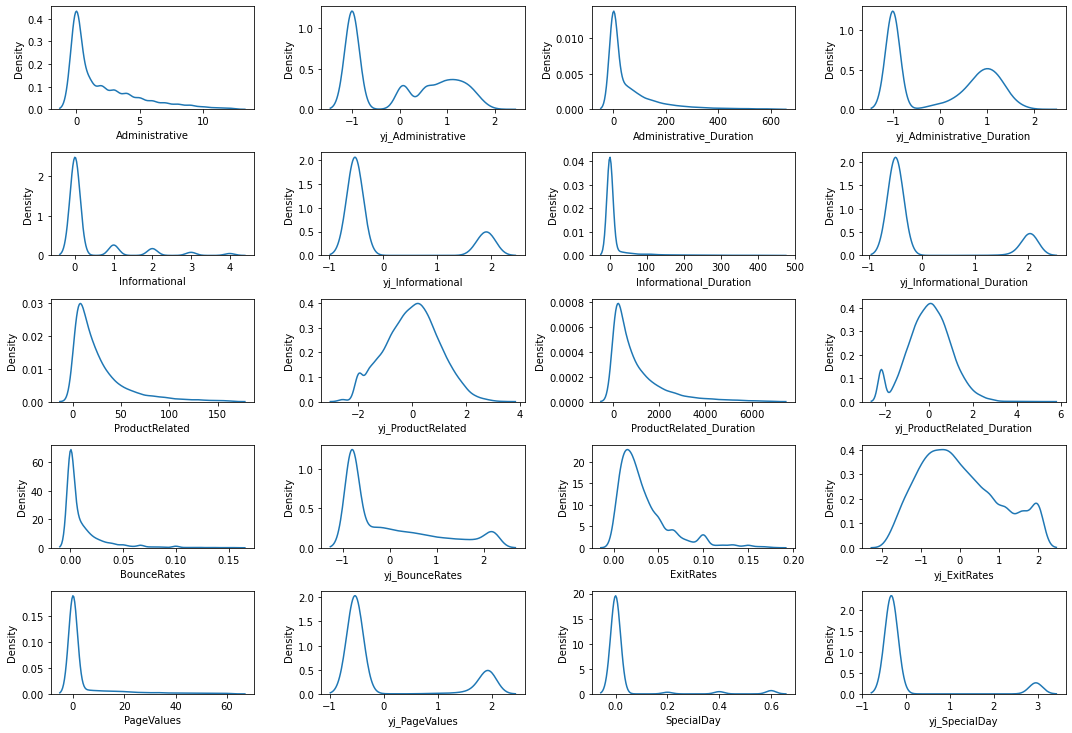

In [35]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_yeo_jo, x=nums_yj[i])

    plt.tight_layout()

#### E. Feature encoding

In [36]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_feature_encoding = df_ol_shop_yeo_jo.copy()
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
6084,Sep,2,4,9,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,1.160011,1.962314,-0.247076,-0.111916,-0.532801,-0.33763
10370,Dec,2,2,3,2,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.115887,-0.088161,-0.802948,-0.694566,-0.532801,-0.33763
713,Mar,2,2,7,1,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,0.115887,-0.184388,0.827019,0.450497,-0.532801,-0.33763
11485,Nov,3,2,1,3,Returning_Visitor,True,False,1.780741,1.159300,1.990743,2.052821,1.145981,0.856712,0.246853,0.058623,1.976094,-0.33763
1733,Mar,2,2,7,2,Returning_Visitor,False,False,1.282480,1.139065,-0.523851,-0.494799,1.392946,1.116426,-0.802948,-1.211217,1.938899,-0.33763


##### Label Encoding untuk Fitur Kategorikal

In [37]:
for col in cats:
    print('column:', col, df_ol_shop_feature_encoding[col].value_counts())

column: OperatingSystems 2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
column: Browser 2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
column: TrafficType 2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
column: Month May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    10431
New_Visitor           1693
Other                  

#### One Hot Encoding untuk fitur VisitorType

In [39]:
ohe_visitor_type = pd.get_dummies(df_ol_shop_feature_encoding['VisitorType'], prefix='visitor_type', drop_first=True, )

# print(ohe_visitor_type)
df_ol_shop_feature_encoding = df_ol_shop_feature_encoding.join(ohe_visitor_type)

df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
8342,Nov,3,2,7,13,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.976591,-2.168082,2.219446,2.011278,-0.532801,-0.33763,0,1
4150,May,3,2,8,2,Returning_Visitor,False,False,0.550281,1.174807,-0.523851,-0.494799,-0.751231,-0.556848,1.979165,1.704145,-0.532801,-0.33763,0,1
8169,Dec,2,2,1,2,New_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.074970,-0.546333,-0.802948,-0.716317,-0.532801,-0.33763,0,0
9003,Nov,1,1,3,2,Returning_Visitor,True,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.366868,-1.185889,1.979165,1.491849,-0.532801,-0.33763,0,1
5304,May,2,5,2,3,Returning_Visitor,False,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.751231,-0.959331,-0.802948,-0.002360,-0.532801,-0.33763,0,1


#### Label Encoding untuk Fitur Weekend, Month

In [40]:
mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}



df_ol_shop_feature_encoding['Weekend'] = df_ol_shop_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_feature_encoding['Month'] = df_ol_shop_feature_encoding['Month'].map(mapping_month)
# df_ol_shop_feature_encoding['OperatingSystems'] = df_ol_shop_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
# df_ol_shop_feature_encoding['Browser'] = df_ol_shop_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
# df_ol_shop_feature_encoding['TrafficType'] = df_ol_shop_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor
3363,5,4,2,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,0.498013,0.419157,-0.802948,-1.277827,-0.532801,-0.33763,0,1
2829,5,2,2,1,13,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,0.069761,-0.802948,-0.965028,-0.532801,-0.33763,0,1
9733,12,2,2,1,2,Returning_Visitor,0,False,0.834177,1.147727,1.953214,1.845813,1.214113,1.184263,-0.487988,0.001854,1.823183,-0.33763,0,1
9009,11,2,10,1,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.896564,-0.802948,1.374614,-0.532801,-0.33763,0,1
4543,5,1,1,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.664530,-0.802948,0.200527,-0.532801,-0.33763,0,1


In [41]:
df_ol_shop_feature_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           12205 non-null  int64  
 1   OperatingSystems                12205 non-null  int64  
 2   Browser                         12205 non-null  int64  
 3   Region                          12205 non-null  int64  
 4   TrafficType                     12205 non-null  int64  
 5   VisitorType                     12205 non-null  object 
 6   Weekend                         12205 non-null  int64  
 7   Revenue                         12205 non-null  bool   
 8   yj_Administrative               12205 non-null  float64
 9   yj_Administrative_Duration      12205 non-null  float64
 10  yj_Informational                12205 non-null  float64
 11  yj_Informational_Duration       12205 non-null  float64
 12  yj_ProductRelated               

#### Fitur Encoding untuk fiture OS, browser type, traffic type

In [ ]:
def map_operating_system_type(data):
    if(data['OperatingSystems'] == 1):
        return 0
    elif(data['OperatingSystems'] == 3):  
        return 1
    elif(data['OperatingSystems'] == 4):  
        return 2
    else:
        return 3

def map_browser_type(data):
    if(data['Browser'] == 1):
        return 0
    elif(data['Browser'] == 4):  
        return 1
    elif(data['Browser'] == 5):  
        return 2
    elif(data['Browser'] == 6):  
        return 3
    elif(data['Browser'] == 10):  
        return 4
    elif(data['Browser'] == 8):  
        return 5
    elif(data['Browser'] == 3):  
        return 6
    elif(data['Browser'] == 7):  
        return 7
    elif(data['Browser'] == 13):  
        return 8
    else:
        return 9


def map_traffic_type(data):
    if(data['TrafficType'] == 1):
        return 0
    elif(data['TrafficType'] == 3):  
        return 1
    elif(data['TrafficType'] == 4):  
        return 2
    elif(data['TrafficType'] == 13):  
        return 3
    elif(data['TrafficType'] == 10):  
        return 4
    elif(data['TrafficType'] == 6):  
        return 5
    elif(data['TrafficType'] == 8):  
        return 6
    elif(data['TrafficType'] == 5):  
        return 7
    elif(data['TrafficType'] == 11):  
        return 8
    elif(data['TrafficType'] == 20):  
        return 9
    else:
        return 10



#### F. Handle class imbalance

In [42]:
df_ol_shop_feature_encoding['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

#### Distribusi nilai unik pada target mengalami ketimpangan, sehingga perlu dilakukan handling class imbalance 

Memisahkan data fitur dengan label

In [43]:
x = df_ol_shop_feature_encoding[[col for col in df_ol_shop_feature_encoding.columns if col not in ['VisitorType','Revenue']]].values
y = df_ol_shop_feature_encoding['Revenue'].values

Split untuk data training dan test

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

##### Over Sampling

In [45]:
x_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(random_state=123).fit_resample(x_train, y_train)

In [46]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     8268
dtype: int64


#### Karena nilai unik target mengalami ketimpangan yang cukup jauh, maka dilakukan Handling Class Imbalance dengan cara melakukan Oversampling dengan menggunakan SMOTE pembagian rasio 50-50